In [1]:
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4

In [3]:
%%time

#! Sample HF/cc-pVDZ H2O Computation

psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')


  Memory set to 476.837 MiB by Python driver.

Scratch directory: /tmp/

*** tstart() called on cm006.hpc.nyu.edu
*** at Thu Nov  7 14:37:17 2024

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                

-76.0266327350902

In [4]:
%%time

#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')


Scratch directory: /tmp/

*** tstart() called on cm006.hpc.nyu.edu
*** at Thu Nov  7 14:40:58 2024

   => Loading Basis Set <=

    Name: 6-31G**
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry C          line   115 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 
    atoms 2-3 entry H          line    44 file /ext3/miniconda3/share/psi4/basis/6-31gss.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              UHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 3:

       Center              X                  Y                   Z               Mass       
    ------------

-38.92533462893707

In [5]:
%%time

psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)


Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cm006.hpc.nyu.edu
*** at Thu Nov  7 14:42:47 2024

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y        

-76.02703272937481

In [6]:
%%time 

scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on cm006.hpc.nyu.edu
*** at Thu Nov  7 14:43:55 2024

   => Loading Basis Set <=

    Name: CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1   entry O          line   198 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 
    atoms 2-3 entry H          line    22 file /ext3/miniconda3/share/psi4/basis/cc-pvdz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    476 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C2v

    Geometry (in Angstrom), charge =

In [7]:
%%time

# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")

psi4.set_options({'scf_type': 'df',
                  'freeze_core': True})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)


Scratch directory: /tmp/
  SAPT does not make use of molecular symmetry, further calculations in C1 point group.
   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1-2, 7-8  entry C          line   164 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 
    atoms 3-6, 9-10 entry H          line    36 file /ext3/miniconda3/share/psi4/basis/jun-cc-pvdz.gbs 


  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  //              Dimer HF             //
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//


*** tstart() called on cm006.hpc.nyu.edu
*** at Thu Nov  7 14:48:37 2024

   => Loading Basis Set <=

    Name: JUN-CC-PVDZ
    Role: ORBITAL
    Keyword: BASIS
    

-0.0022355823909805178

In [8]:
%%time


#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

In [13]:
%%time 

psi4.set_output_file('output.dat', False)


argon_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 3.0, 4.0, 4.5, 5.0, 5.5, 6.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    argon_dimer = psi4.geometry(argon_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=argon_dimer)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))



CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.169820
            3.0                        3.005152
            4.0                        -0.122889
            4.5                        -0.095152
            5.0                        -0.055968
            5.5                        -0.032099
            6.0                        -0.018882
CPU times: user 42 s, sys: 5.08 s, total: 47.1 s
Wall time: 48.3 s


Fitted parameters: sigma = 3.642 Å, epsilon = 0.120 kcal/mol


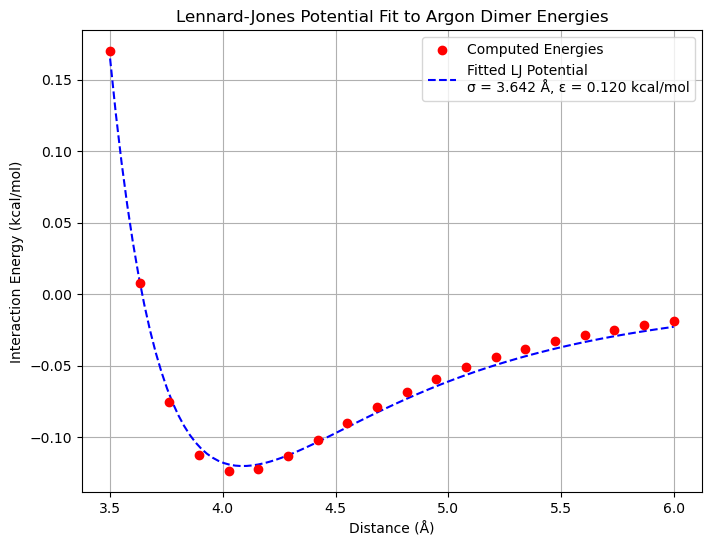

CPU times: user 2min 4s, sys: 14.7 s, total: 2min 18s
Wall time: 2min 25s


In [23]:
%%time

import numpy as np
import psi4
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Define the Lennard-Jones potential function
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Define the Argon-Argon dimer geometry (same as your previous code, with placeholder for distance)
argon_geometry = """
Ar
--
Ar 1 {0}
"""

# Set distances from 3.5 Å to 6.0 Å (inclusive)
Rvals = np.linspace(3.5, 6.0, 20)  # 6 distances from 3.5 to 6.0 Å

# Set options for Psi4 (you can adjust the basis set and method if necessary)
psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary to store the energies
ecp = {}

# Loop through the distances and compute the interaction energy for each
for R in Rvals:
    # Create the Argon dimer geometry for the current R
    argon_dimer = psi4.geometry(argon_geometry.format(R))
    
    # Compute the energy using CCSD(T)/aug-cc-pVDZ with BSSE correction
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=argon_dimer)

# Convert the energies from Hartrees to kcal/mol
energies = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])

# Use scipy.optimize.curve_fit to fit the Lennard-Jones potential to the computed energies
def fit_lj_potential(Rvals, energies):
    # Initial guesses for sigma and epsilon (typical values for Argon)
    popt, _ = opt.curve_fit(lj, Rvals, energies, p0=[3.4, 0.010])  # initial guesses for sigma and epsilon
    return popt

# Fit the Lennard-Jones potential to the energy data
sigma, eps = fit_lj_potential(Rvals, energies)

# Generate a smooth curve for the fitted Lennard-Jones potential
r_fit = np.linspace(3.5, 6.0, 100)
energy_fit = lj(r_fit, sigma, eps)

# Print the fitted parameters
print(f"Fitted parameters: sigma = {sigma:.3f} Å, epsilon = {eps:.3f} kcal/mol")

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(Rvals, energies, color='red', label='Computed Energies', zorder=5)  # Computed data as red dots
plt.plot(r_fit, energy_fit, label=f'Fitted LJ Potential\nσ = {sigma:.3f} Å, ε = {eps:.3f} kcal/mol', color='blue', linestyle='--', zorder=4)  # Fitted curve as dashed line

# Labels and title
plt.xlabel('Distance (Å)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.title('Lennard-Jones Potential Fit to Argon Dimer Energies')

# Add a legend
plt.legend()

# Show grid and plot
plt.grid(True)
plt.savefig('Ar2_Interaction_Energy.png', dpi=300)
plt.show()


In [20]:
%%time

import numpy as np
import psi4
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Define the Lennard-Jones potential function
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)

# Define the Argon-Argon dimer geometry (same as your previous code, with placeholder for distance)
neon_geometry = """
Ne
--
Ne 1 {0}
"""

# Set distances from 3.5 Å to 6.0 Å (inclusive)
Rvals = np.linspace(2.0, 6.0, 20)  # 6 distances from 3.5 to 6.0 Å

# Set options for Psi4 (you can adjust the basis set and method if necessary)
psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary to store the energies
ecp = {}

# Loop through the distances and compute the interaction energy for each
for R in Rvals:
    # Create the Argon dimer geometry for the current R
    neon_dimer = psi4.geometry(neon_geometry.format(R))
    
    # Compute the energy using CCSD(T)/aug-cc-pVDZ with BSSE correction
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=neon_dimer)

# Convert the energies from Hartrees to kcal/mol
energies = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])

# Use scipy.optimize.curve_fit to fit the Lennard-Jones potential to the computed energies
def fit_lj_potential(Rvals, energies):
    # Initial guesses for sigma and epsilon (typical values for Argon)
    popt, _ = opt.curve_fit(lj, Rvals, energies, p0=[3.4, 0.010])  # initial guesses for sigma and epsilon
    return popt

# Fit the Lennard-Jones potential to the energy data
sigma, eps = fit_lj_potential(Rvals, energies)

# Generate a smooth curve for the fitted Lennard-Jones potential
r_fit = np.linspace(2.0, 6.0, 100)
energy_fit = lj(r_fit, sigma, eps)

# Print the fitted parameters
print(f"Fitted parameters: sigma = {sigma:.3f} Å, epsilon = {eps:.3f} kcal/mol")

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(Rvals, energies, color='red', label='Computed Energies', zorder=5)  # Computed data as red dots
plt.plot(r_fit, energy_fit, label=f'Fitted LJ Potential\nσ = {sigma:.3f} Å, ε = {eps:.3f} kcal/mol', color='blue', linestyle='--', zorder=4)  # Fitted curve as dashed line

# Labels and title
plt.xlabel('Distance (Å)')
plt.ylabel('Interaction Energy (kcal/mol)')
plt.title('Lennard-Jones Potential Fit to Argon Dimer Energies')

# Add a legend
plt.legend()

# Show grid and plot
plt.grid(True)
plt.savefig('Ne2_Interaction_Energy.png', dpi=300)
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

(-0.05, 0.5)

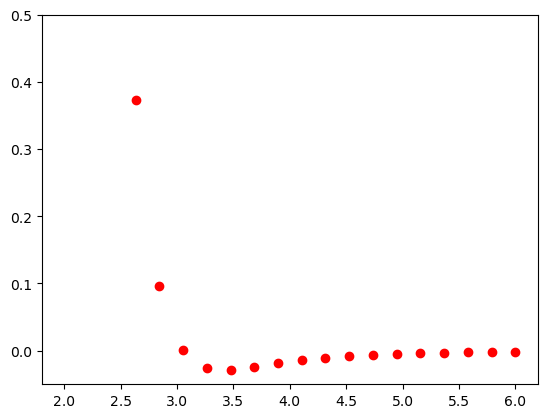

In [22]:
plt.scatter(Rvals, energies, color='red', label='Computed Energies', zorder=5)  # Computed data as red dots
plt.ylim(-0.05,0.5)
